In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## **DATA EXPLORATION AND PREPROCESSING**

In [23]:
df= pd.read_csv("Adidas Vs Nike.csv")
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [24]:
df.shape

(3268, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [26]:
df.nunique()

Product Name     1531
Product ID       3179
Listing Price      78
Sale Price        227
Discount            6
Brand               5
Description      1762
Rating             32
Reviews           102
Last Visited      318
dtype: int64

### **Data conversion**

In [27]:
df["Brand"] = df["Brand"].astype("category")

df["Last Visited"] = pd.to_datetime(df["Last Visited"])

### **Finding missing values**

In [28]:
df.isna().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64

Only three rows contain missing data, and all of them are in the Description column. The description of the products does not hold valuable information for the analysis, unlike the other parameters of the products. Therefore, it is beneficial to keep them

In [29]:
df[df["Description"].isna()== True]

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
2780,Nike React Infinity Run Flyknit,CD4371-001,0,13995,0,Nike,NaN,4.6,68,2020-04-13 15:30:15
2888,Nike React Infinity Run Flyknit,CD4372-004,0,13995,0,Nike,NaN,4.2,29,2020-04-13 15:32:18
3133,Nike Free X Metcon 2,CD8526-446,0,9995,0,Nike,NaN,3.0,7,2020-04-13 15:36:37


### **Finding duplicates**

Since we are looking for identical products, I exlude the running indices and the date of last visits from filtering

In [30]:
duplicated = df[df.duplicated(["Product Name", "Product ID", "Listing Price", "Sale Price", "Brand", "Description", "Rating", "Reviews"], keep = False)].sort_values("Description")
duplicated.head(4)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
3062,Air Jordan 12 Retro,130690-017,0,15995,0,Nike,An all-time favourite among players and sneake...,4.5,24,2020-04-13 15:34:36
2751,Air Jordan 12 Retro,130690-017,0,15995,0,Nike,An all-time favourite among players and sneake...,4.5,24,2020-04-13 15:28:25
3115,Nike Zoom Rise,BQ5467-101,11995,8397,0,Nike,"Bounce like never before in the Zoom Rise, Nik...",4.0,2,2020-04-13 15:36:32
3171,Nike Zoom Rise,BQ5467-101,11995,8397,0,Nike,"Bounce like never before in the Zoom Rise, Nik...",4.0,2,2020-04-13 15:36:49


In [31]:
len(duplicated)

175

In [32]:
"".join(duplicated["Brand"].unique())

'Nike'

There appear to be 175 non-unique products in the dataset, all belonging to Nike. We don't have enough information to determine exactly why some products appear more than once on the list, but some possible reasons could be color, material or other characteristics that give more variation to the same product.


### **Values in Brand column**

In [33]:
df["Brand"].unique()

['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO', 'Adidas SPORT PERFORMANCE', 'Nike']
Categories (5, object): ['Adidas Adidas ORIGINALS', 'Adidas CORE / NEO', 'Adidas ORIGINALS', 'Adidas SPORT PERFORMANCE', 'Nike']

### **Inserting a column to help filter the two main brand**

The purpose of the analysis is to compare the characteristics of Adidas and Nike products, so I ignore the Adidas sub-brands and label all of them with Adidas as the main brand.

In [34]:
df["Main Brand"] = df["Brand"].apply(lambda x: "Nike" if x == "Nike" else "Adidas")

df.head(2).append(df.tail(2))

C:\Users\Dori\AppData\Local\Temp\ipykernel_1900\2185943354.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head(2).append(df.tail(2))


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Main Brand
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14,Adidas
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15,Adidas
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13 15:41:19,Nike
3267,Nike P-6000 SE,CJ9585-600,8995,6297,0,Nike,"A mash-up of Pegasus' past, the Nike P-6000 SE...",0.0,0,2020-04-13 15:42:57,Nike


# **DATA ANALYSIS**

### **Number of products**

In [35]:
count_items = df.groupby("Main Brand").size()
count_items

Main Brand
Adidas    2625
Nike       643
dtype: int64

Adidas offers four times more products than Nike, which is a significant difference

### **Exploring some statistics on sale prices, discounts, ratings and reviews**

### *Sale Price*

<AxesSubplot:xlabel='Main Brand', ylabel='Sale Price'>

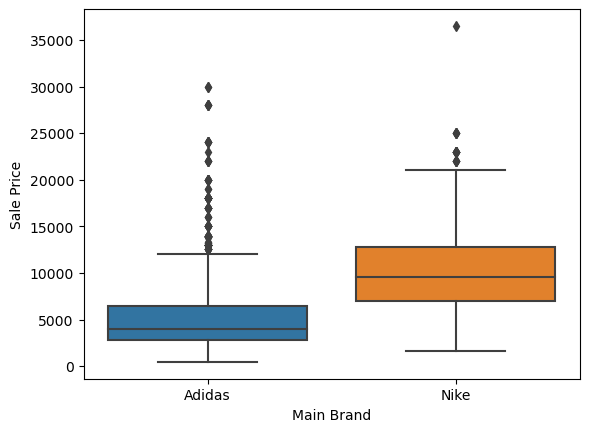

In [36]:
# Unfortunatelly the currency is not indicated in the dataset

sns.boxplot(data = df, x = "Main Brand", y = "Sale Price")

It seems that Adidas generally offers its products cheaper than Nike. Both brands represent extreme values, but Nike's prices are more symmetrically distributed.

#### Average sale price

We can read the average sale price from the box plot, but let's see it more precisly

In [37]:
df.groupby("Main Brand")["Sale Price"].mean()

Main Brand
Adidas     5135.004190
Nike      10213.676516
Name: Sale Price, dtype: float64

#### Variability

Text(0, 0.5, 'Frequency')

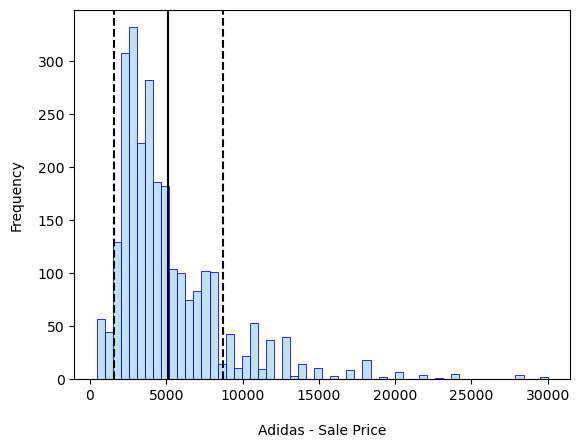

In [38]:
adidas = df.loc[df["Main Brand"] == "Adidas", "Sale Price"]
adidas_avg = adidas.mean()  
adidas_std = adidas.std()

adidas_std_a = adidas_avg + adidas_std 
adidas_std_b = adidas_avg - adidas_std 



sns.histplot(x = adidas, edgecolor = "blue", color = "lightblue" )

plt.axvline(x = adidas_std_b, ymin = 0, ymax = adidas.max(), linestyle = "--", color = "black" )  # below the mean
plt.axvline(x = adidas_avg, ymin = 0, ymax = adidas.max(),  color = "black" )
plt.axvline(x = adidas_std_a, ymin = 0, ymax = adidas.max(), linestyle = "--", color = "black" )  # alow the mean

plt.xlabel("Adidas - Sale Price", labelpad = 15 )
plt.ylabel("Frequency", labelpad = 10 )

Text(0, 0.5, 'Frequency')

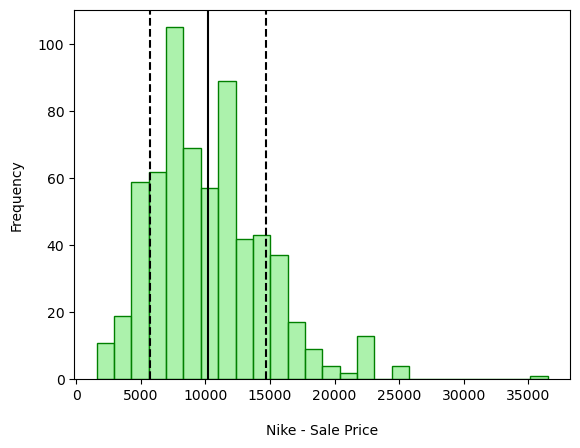

In [39]:
nike = df.loc[df["Main Brand"] == "Nike", "Sale Price"]
nike_avg = nike.mean() 
nike_std = nike.std()

nike_std_a = nike_avg + nike_std
nike_std_b = nike_avg - nike_std

sns.histplot(x = nike,  edgecolor = "green", color = "lightgreen" )

plt.axvline(x = nike_std_b, ymin = 0, ymax = nike.max(), linestyle = "--", color = "black" )  # below the mean
plt.axvline(x = nike_avg, ymin = 0, ymax = nike.max(),  color = "black" )
plt.axvline(x = nike_std_a, ymin = 0, ymax = nike.max(), linestyle = "--", color = "black" )  # above the mean

plt.xlabel("Nike - Sale Price", labelpad = 15 )
plt.ylabel("Frequency", labelpad = 10 )


### *Discount*

By filtering discount values, it seems Nike doesn't offer any, but by examining listing and sale prices, it appears that Nike does offer some. So, for a fair comparison, I calculate and fill in the values for Nike

In [40]:
df[df["Main Brand"] == "Nike"]["Discount"].unique()

array([0], dtype=int64)

In [41]:
df["Discount"] = df.apply(lambda x: 100 - round((x["Sale Price"]/x["Listing Price"])*100) if (x["Main Brand"] == "Nike") & (x["Listing Price"] != 0) else x["Discount"], axis = 1  )

df.tail()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Main Brand
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,20,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13 15:41:01,Nike
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,30,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13 15:41:03,Nike
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,30,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13 15:41:07,Nike
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13 15:41:19,Nike
3267,Nike P-6000 SE,CJ9585-600,8995,6297,30,Nike,"A mash-up of Pegasus' past, the Nike P-6000 SE...",0.0,0,2020-04-13 15:42:57,Nike


In [42]:
# Unique discount values

np.sort(df["Discount"].unique())

array([ 0, 20, 25, 30, 40, 50, 60], dtype=int64)

<AxesSubplot:xlabel='Main Brand', ylabel='Discount'>

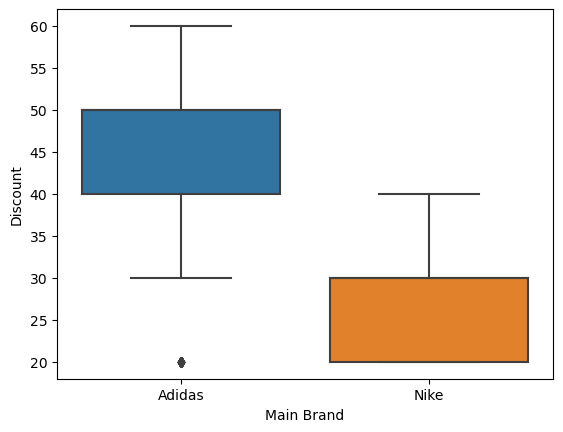

In [43]:
sns.boxplot(data = df[df["Discount"] > 0], x = "Main Brand", y = "Discount")

#### Proportion of discounted products per brand

In [44]:
# Counting the discounted products per brand
count_discounted = df.query("Discount > 0").groupby("Main Brand").apply(lambda x: x["Discount"].count())

# Calculating percentage
pct_discounted = count_discounted / count_items

# Coverting floating numbers to formatted percentage
def covert_to_pct(series):
    disc_dict = {}
    disc_list = []
    brands = series.index
    for b in brands:
        val = "{:.2%}".format(series[b])
        disc_dict = {b: val}
        disc_list.append(disc_dict)
        
    return disc_list 
    
res = covert_to_pct(pct_discounted)

# I convert the result to Dataframe just for easier readability, since I dont use visualization
ptc_discounted_df =  pd.DataFrame(pd.Series(data = ["".join(x.values()) for x in res], index = ["".join(x.keys()) for x in res])).rename(columns={0:"Percentage of Discounted Porducts"})
ptc_discounted_df

,Percentage of Discounted Porducts
Adidas,74.90%
Nike,33.75%


In conclusion, Adidas offers a better deal overall in terms of discounts. Almost 3/4 of their products are discounted compared to Nike, which only offers 1/3 of their products at a discount.
As the box chart shows, most Adidas products are 40%-50% off, while Nike offers a 20%-30% discount on most products. 
The lowest discount is 20% for both brands and the highest is 60% for Adidas and 40% for Nike.

### *Rating*

In [45]:
# Rating scale

np.sort(df["Rating"].unique())

array([0. , 1. , 1.5, 2. , 2.2, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1,
       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4,
       4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [46]:
len(df[df["Rating"] == 0])

302

There are 302 products that don't have a rating, so I don't take these into account when calculating the average rating.

In [47]:
not_zero_rating_df = df[df["Rating"] != 0]


round(not_zero_rating_df[not_zero_rating_df["Rating"] != 0].groupby("Main Brand")["Rating"].mean().to_frame().rename(columns = {"Rating": "Average Rating"}), 3)

,Average Rating
Main Brand,
Adidas,3.463
Nike,4.248


#### Percentage of top-rated products compared to all rated products.

In [48]:
count_five_rate = df.groupby("Main Brand")["Rating"].apply(lambda x: (x == 5).sum()) 
count_rated_items = not_zero_rating_df.groupby("Main Brand").size()
pct_five_rated = round((count_five_rate / count_rated_items)*100, 2)

df_five_rated = pd.concat([count_rated_items, pct_five_rated,], axis=1)
df_five_rated.columns = ["Num. of Rated", "Ptc. of 5 rating"]
df_five_rated


,Num. of Rated,Ptc. of 5 rating
Main Brand,,
Adidas,2552,3.41
Nike,414,28.99


It's interesting to see that even though Nike offers fewer products, fewer and lower discounts but higher average sale price, they still managed to gain more out of the 5 rating, than the competitor.

### *Review*

#### Top 3 most reviewed products

In [49]:
df.sort_values(["Reviews"], ascending = [False]).head(3)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,Main Brand
2750,Air Jordan 10 Retro,310805-137,0,15995,0,Nike,"Featuring soft, lightweight cushioning, the Ai...",4.7,223,2020-04-13 15:28:25,Nike
2805,Nike Zoom Fly,880848-005,0,14495,0,Nike,Built with a carbon-infused nylon plate inspir...,4.3,105,2020-04-13 15:30:22,Nike
560,Men's adidas Outdoor Geocach 19 Shoes,CM0012,4999,2499,50,Adidas SPORT PERFORMANCE,These hiking shoes have a sturdy synthetic upp...,2.4,99,2020-04-13 15:06:38,Adidas


#### Percentage of reviewed products per brand

In [50]:
count_of_reviews =  df[df["Reviews"] != 0].groupby("Main Brand").size()  
pct_of_reviews = count_of_reviews / count_items

pct_of_reviews_df = pd.DataFrame(["{:.2%}".format(x) for x in pct_of_reviews], index = [pct_of_reviews.index]).rename(columns = {0 :"Percentage of reviews"})
pct_of_reviews_df

,Percentage of reviews
Main Brand,
Adidas,98.93%
Nike,64.39%


Adidas customers were more active in giving their opinions. This may be one out the many reasons why Adidas has far fewer 5 rated products than Nike, as the more reviews, the higher the chance of negative feedback.

### *Reviews & Ratings*

#### Products with the highest rating and most reviews per brand

In [51]:
def best_rate_review_by_brands(s):
    # filter each group with highest rate value
    max_rate_df = s[s["Rating"] == s["Rating"].max()]
    # filter rows further with the highest value in Reviews column 
    max_rate_review_df = max_rate_df[max_rate_df["Reviews"] == max_rate_df["Reviews"].max()]
    return max_rate_review_df
    

best_rate_review_items = df.groupby("Main Brand").apply(best_rate_review_by_brands)
best_rate_review_items


Product Name  Product ID  \
Main Brand                                                        
Adidas     267    Men's adidas Toe Side II Slippers      CM0070   
           1800  Men's adidas Running Asweego Shoes      F35560   
Nike       2635                     Nike Air Max 90  CD0490-104   
           2695                     Nike Air Max 90  CD0490-101   

                 Listing Price  Sale Price  Discount              Brand  \
Main Brand                                                                
Adidas     267            1299         779        40  Adidas CORE / NEO   
           1800           7999        3999        50  Adidas CORE / NEO   
Nike       2635              0        9995         0               Nike   
           2695              0        9995         0               Nike   

                                                       Description  Rating  \
Main Brand                                                                   
Adidas     267   The adidas casual slippers for men with a stri...     5.0   
           1800  Shoes with flexibility and responsiveness for ...     5.0   
Nike       2635  Clean lines, versatile and timeless—the people...     5.0   
           2695  Clean lines, versatile and timeless—the people...     5.0   

                 Reviews        Last Visited Main Brand  
Main Brand                                               
Adidas     267        99 2020-04-13 15:06:28     Adidas  
           1800       99 2020-04-13 15:07:28     Adidas  
Nike       2635        9 2020-04-13 15:28:00       Nike  
           2695        9 2020-04-13 15:28:15       Nike

### *Reviews & Discounts*

In [52]:

def brands_reviews_discounts(x):
    brands_list = []
    brands_dict = {}
    main_brands = x["Main Brand"].unique()
    
    for brand in main_brands:
        brands_df = x[x["Main Brand"] == brand]
        count_reviewed_and_discounted = len(brands_df[(brands_df["Reviews"] > 0) & (brands_df["Discount"] > 0) ])
        count_reviewed_not_discounted = len(brands_df[(brands_df["Reviews"] > 0) & (brands_df["Discount"] ==  0)])
        count_not_reviewed_discounted = len(brands_df[(brands_df["Reviews"] == 0) & (brands_df["Discount"] >  0)])
        count_not_reviewed_not_discounted = len(brands_df[(brands_df["Reviews"] == 0) & (brands_df["Discount"] ==  0)])
        #num_discounted = len(brands_df[brands_df["Discount"] > 0])
        total = len(brands_df)

        
        brands_dict = { "Reviewed and Discounted" : count_reviewed_and_discounted,
                        "Reviewed but Not Discounted" : count_reviewed_not_discounted,
                        "Not Reviewed but Discounted" : count_not_reviewed_discounted,
                        "Not Reviewed and Not Discounted" : count_not_reviewed_not_discounted,
                        # "Number of Discounted Products" : num_discounted,
                        "Total Products" : total
                        }
        brands_list.append(brands_dict)
        
    return brands_list
    
result_brands = brands_reviews_discounts(df)



In [53]:
df_discounts_reviews = pd.DataFrame(result_brands, index = ["Adidas", "Nike"])
df_discounts_reviews

,Reviewed and Discounted,Reviewed but Not Discounted,Not Reviewed but Discounted,Not Reviewed and Not Discounted,Total Products
Adidas,1946,651,20,8,2625
Nike,155,259,62,167,643


We may conclude that the higher interest in Adidas products was boosted by offering relatively high discounts on 75% of their products.